In [2]:
import scanpy as sc

In [2]:
sc.settings.verbosity = 3
sc.set_figure_params(dpi=80, frameon=False, color_map='viridis_r', dpi_save=600)
palette_d = ['#378C4F', '#6DB6FFFF', '#F5CDCD', '#D9579B', '#A59ACB', '#7464AA', '#7BBC5E',  '#006DDBFF', '#B6DBFFFF', '#E2A7CC', '#924900FF']

In [4]:
adata_sn = scvi.data.read_h5ad('snRNA_TNK.h5ad')

In [5]:
adata = adata_sc.concatenate(adata_sn)

/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [6]:
adata.obs

,patient_id,condition,sampletype,nCount_RNA,nFeature_RNA,mt_ratio,celltype,batch
PNT1_CAACAACAGCTTCGTA-1-0,scPNT1,PNT,scRNA-seq,46248.0,6285,4.900681,Proliferating T,0
PNT1_CATTTCACATACGCAT-1-0,scPNT1,PNT,scRNA-seq,27468.0,4697,4.572171,Proliferating T,0
PNT1_AAGGAATGTCAAACGG-1-0,scPNT1,PNT,scRNA-seq,27436.0,4751,6.119658,Proliferating T,0
PNT1_AGTCTCCCATCTGTTT-1-0,scPNT1,PNT,scRNA-seq,27117.0,5116,3.903654,Proliferating T,0
PNT1_AACAAAGGTGTAGCAG-1-0,scPNT1,PNT,scRNA-seq,24606.0,4629,4.635989,Proliferating T,0
...,...,...,...,...,...,...,...,...
RT3_TGTGATGGTCCAAAGG-1-1,snRT3,PT,snRNA-seq,1786.0,1234,3.924647,Unknown,1
RT3_CCAAGCGTCTCGTGGG-1-1,snRT3,PT,snRNA-seq,1595.0,1057,6.091070,Unknown,1
RT3_GAACTGTAGTGTGTTC-1-1,snRT3,PT,snRNA-seq,1675.0,1122,1.694915,Unknown,1
RT3_TCGTGGGAGGTTGGTG-1-1,snRT3,PT,snRNA-seq,1623.0,1070,0.348028,Unknown,1


In [7]:
adata.layers['counts'] = adata.X.copy() # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

normalizing counts per cell
    finished (0:00:00)


In [8]:
# select HVGs
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=3000,
    layer="counts",
    batch_key="sampletype",
    subset=True
)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [9]:
adata.obs['sampletype']

PNT1_CAACAACAGCTTCGTA-1-0    scRNA-seq
PNT1_CATTTCACATACGCAT-1-0    scRNA-seq
PNT1_AAGGAATGTCAAACGG-1-0    scRNA-seq
PNT1_AGTCTCCCATCTGTTT-1-0    scRNA-seq
PNT1_AACAAAGGTGTAGCAG-1-0    scRNA-seq
                               ...    
RT3_TGTGATGGTCCAAAGG-1-1     snRNA-seq
RT3_CCAAGCGTCTCGTGGG-1-1     snRNA-seq
RT3_GAACTGTAGTGTGTTC-1-1     snRNA-seq
RT3_TCGTGGGAGGTTGGTG-1-1     snRNA-seq
RT3_GCGGATCGTTGAGTCT-1-1     snRNA-seq
Name: sampletype, Length: 54091, dtype: category
Categories (2, object): ['scRNA-seq', 'snRNA-seq']

In [10]:
# setup anndata
scvi.model.SCVI.setup_anndata(
    adata,
    layer='counts',
    categorical_covariate_keys=["sampletype", "patient_id"],
    continuous_covariate_keys=["mt_ratio"]
)

In [11]:
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood='nb')

In [12]:
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A4500 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 148/148: 100%|███████████████████████████████████████████████| 148/148 [07:46<00:00,  3.06s/it, loss=756, v_num=1]

`Trainer.fit` stopped: `max_epochs=148` reached.


Epoch 148/148: 100%|███████████████████████████████████████████████| 148/148 [07:46<00:00,  3.15s/it, loss=756, v_num=1]


In [13]:
# get latent representation 
adata.obsm['X_scvi'] = vae.get_latent_representation()
adata.layers['scvi_normalized'] = vae.get_normalized_expression(library_size=10e4)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


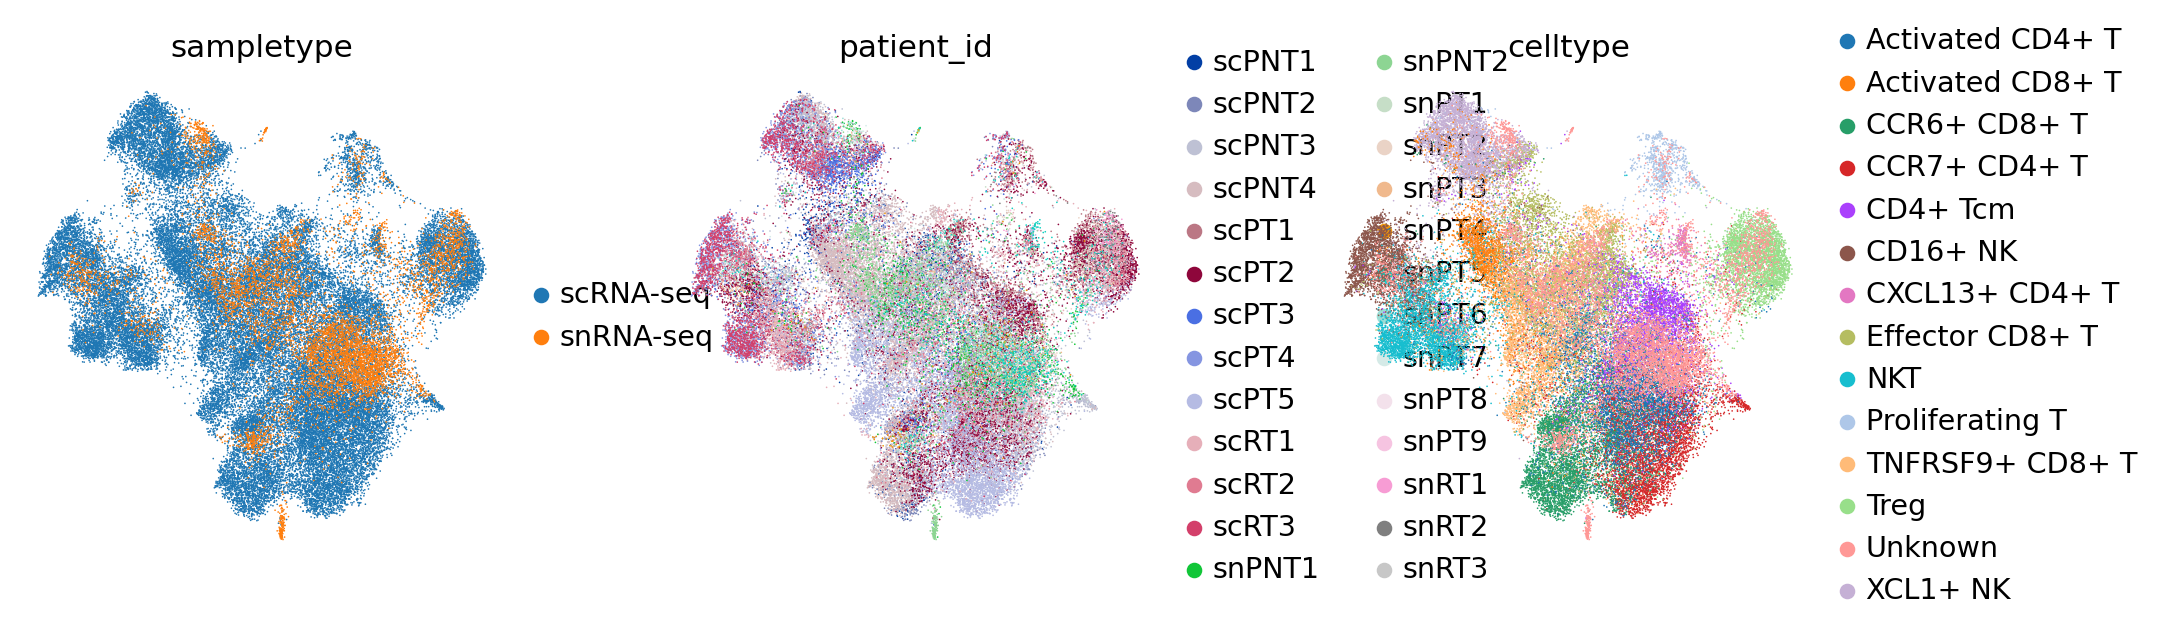

In [14]:
# use the corrected cell embeddings from scvi
sc.pp.neighbors(adata, use_rep='X_scvi')
sc.tl.umap(adata, min_dist=0.3)
sc.pl.umap(
    adata,
    color=["sampletype", "patient_id", "celltype"],
    frameon=False
)

In [42]:
# intergration using scANVI
np.unique(adata.obs["celltype"], return_counts = True)

(array(['Activated CD4+ T', 'Activated CD8+ T', 'CCR6+ CD8+ T',
        'CCR7+ CD4+ T', 'CD16+ NK', 'CD4+ Tcm', 'CXCL13+ CD4+ T',
        'Effector CD8+ T', 'NKT', 'Proliferating T', 'TNFRSF9+ CD8+ T',
        'Treg', 'Unknown', 'XCL1+ NK'], dtype=object),
 array([5396, 2512, 4770, 4509, 2785, 3776,  408, 4366, 4231,  876, 5230,
        3471, 7466, 4295]))

In [51]:
lvae = scvi.model.SCANVI.from_scvi_model(
    vae,
    adata=adata,
    unlabeled_category="Unknown",
    labels_key="celltype",
)

In [52]:
# model training
lvae.train(max_epochs=25)

INFO     Training for 25 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A4500 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 25/25: 100%|███████████████████████████████████████████████████| 25/25 [02:54<00:00,  6.90s/it, loss=836, v_num=1]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 25/25: 100%|███████████████████████████████████████████████████| 25/25 [02:54<00:00,  6.98s/it, loss=836, v_num=1]


In [53]:
# predict labels in snRNA-seq, and get the latent space
adata.obs["C_scANVI"] = lvae.predict(adata)
adata.obsm["X_scANVI"] = lvae.get_latent_representation(adata)
adata.layers['scanvi_normalized'] = lvae.get_normalized_expression(library_size=10e4)

In [54]:
# use the corrected cell embeddings from scanvi
# the label prediction from scanvi seem to be raletively goo# 
sc.pp.neighbors(adata, use_rep='X_scANVI')
sc.tl.umap(adata, min_dist=0.2)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


In [21]:
adata.write('adata_TNK_integrated.h5ad')

In [3]:
adata = sc.read_h5ad('adata_TNK_integrated.h5ad')

In [28]:
sc.tl.louvain(adata, resolution=1.2, key_added='scanvi_louvain_1.2')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'scanvi_louvain_1.2', the cluster labels (adata.obs, categorical) (0:00:08)


/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


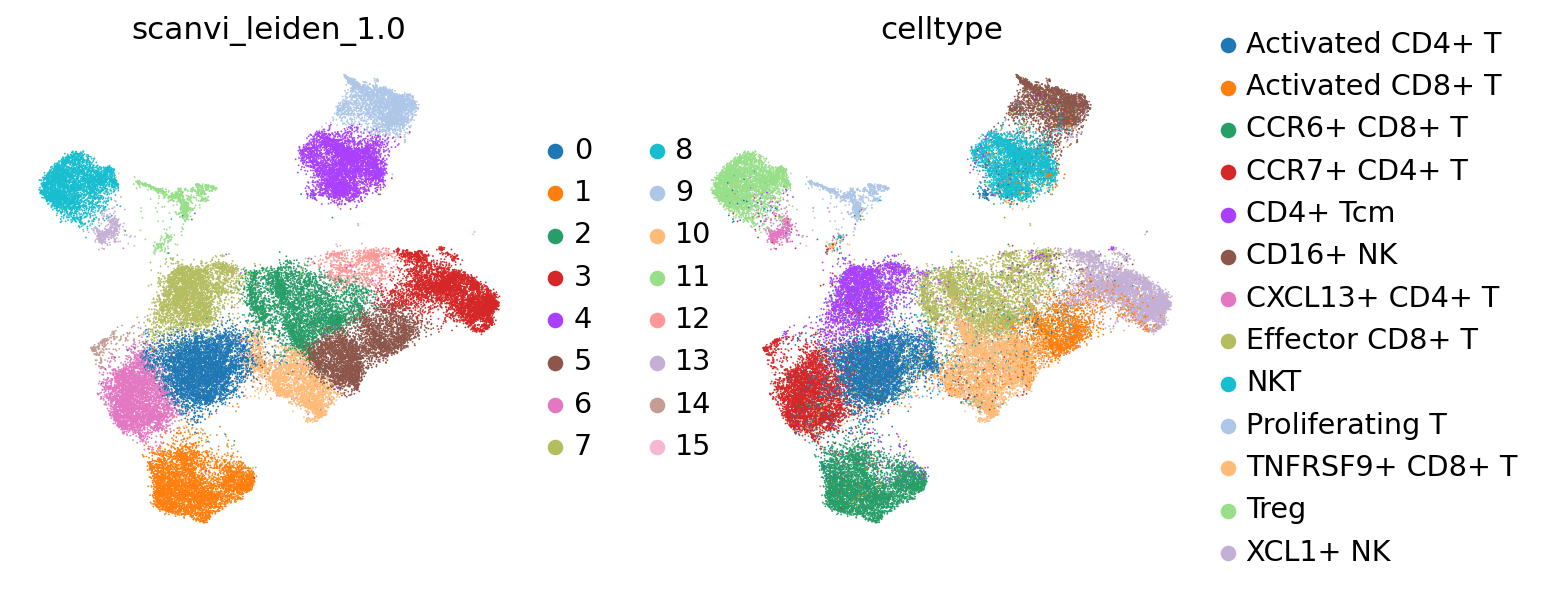

In [33]:
sc.pl.umap(adata, color=['scanvi_leiden_1.0', "celltype"])

In [35]:
# find markers for each cluster
adata.uns['log1p']['base'] = None # solve the key error
sc.tl.rank_genes_groups(adata, 'celltype', method='wilcoxon', use_raw=True)

ranking genes


/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:42)


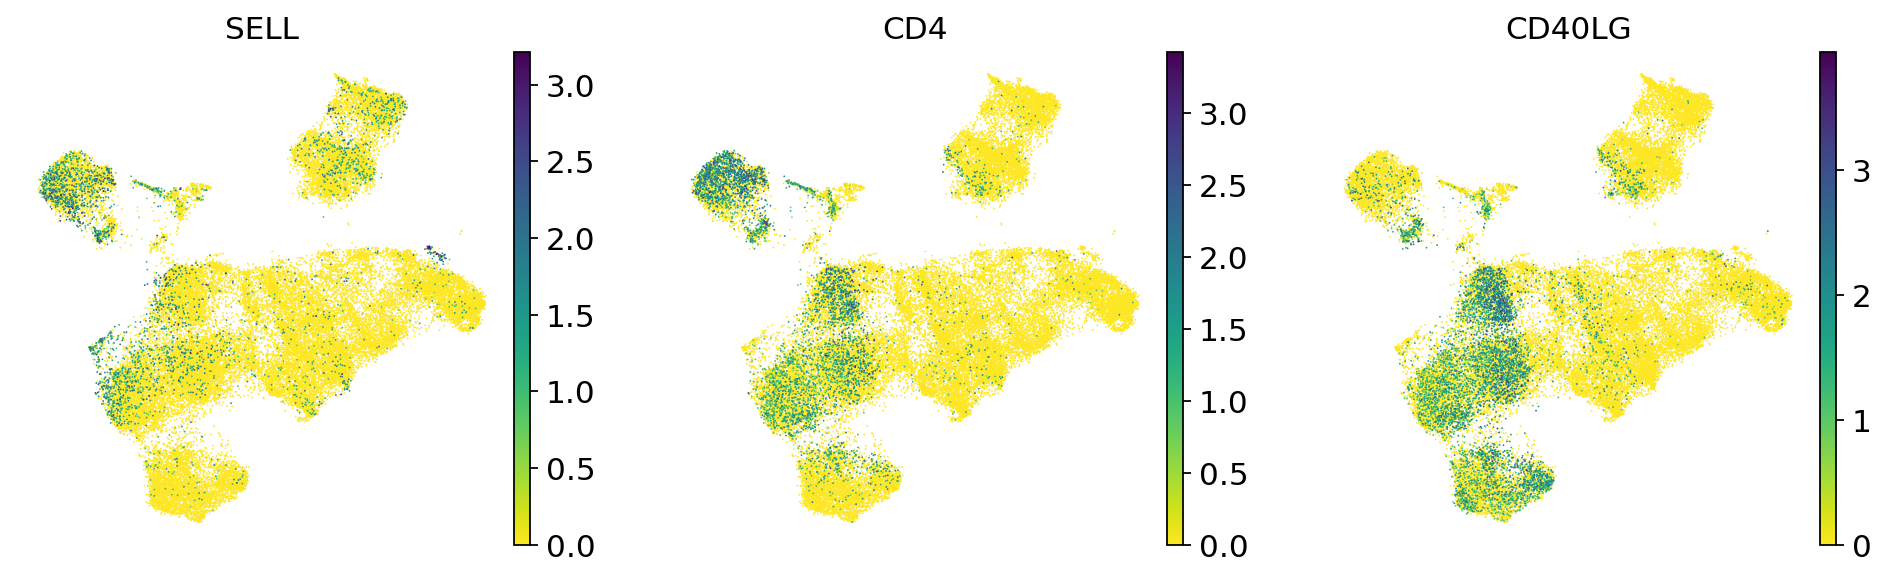

In [50]:
sc.pl.umap(adata, color=["SELL", "CD4", "CD40LG"])

In [44]:
# top 20 genes in each clusters
pd.set_option('display.max_columns', None)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(50)

,Activated CD4+ T,Activated CD8+ T,CCR6+ CD8+ T,CCR7+ CD4+ T,CD4+ Tcm,CD16+ NK,CXCL13+ CD4+ T,Effector CD8+ T,NKT,Proliferating T,TNFRSF9+ CD8+ T,Treg,XCL1+ NK
0,JUNB,JUND,IL7R,TPT1,CD52,NKG7,NR3C1,CCL5,GNLY,STMN1,TUBA4A,CARD16,TYROBP
1,FOS,CMC1,KLRB1,FTH1,LTB,FGFBP2,CXCL13,GZMA,NKG7,HMGN2,CD8A,TIGIT,FCER1G
2,IL7R,HSP90AA1,TPT1,GPR183,TXNIP,GNLY,FKBP5,GZMK,GZMH,TUBB,ATP1B3,IL32,CMC1
3,HSPA1B,YPEL5,CCL20,IL7R,RPL13,GZMB,RBPJ,CCL4,GZMB,PCLAF,YPEL5,TNFRSF18,CCL3
4,RPL32,ZEB2,RPLP1,RPS16,RPS18,FCGR3A,IL6ST,ACTB,FGFBP2,HMGB2,EZR,S100A4,IL2RB
5,RPS12,HSPD1,CEBPD,RPL13,RPL11,PRF1,ITM2A,HCST,CCL5,HMGB1,SRSF7,TBC1D4,KLRD1
6,FOSB,PIK3R1,CCR6,RPS12,RPL34,SPON2,FABP5,XCL2,FCGR3A,DEK,JUND,CTLA4,HSPD1
7,RPL30,REL,SLC4A10,RPL30,RPL36A,KLRD1,RNF19A,CD8B,ZEB2,GAPDH,FAM177A1,TNFRSF4,KLRF1
8,RPS27,TUBA4A,LTB,RPL9,RPS8,CD247,DUSP4,KLRK1,PRF1,TUBA1B,CREM,BATF,XCL2
9,RPL34,HSP90AB1,RORA,RPL10,RPL30,PLAC8,CTLA4,CD8A,KLRD1,MKI67,RGCC,CTSC,CD7


In [51]:
# re-annotation
adata.obs['celltype_scanvi'] = (
    adata.obs["celltype"]
    .map(lambda x: {"CCR6+ CD8+ T": "CD8+ Trm", "CCR7+ CD4+ T": "CD4+ T-naive", "CD4+ Tcm": "CD4+ Tem", "Effector CD8+ T": "CD8+ Tem", "NKT": "CD8+ Temra", "TNFRSF9+ CD8+ T": "CD8+ Tex"}.get(x, x))
    .astype("category")
)

/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


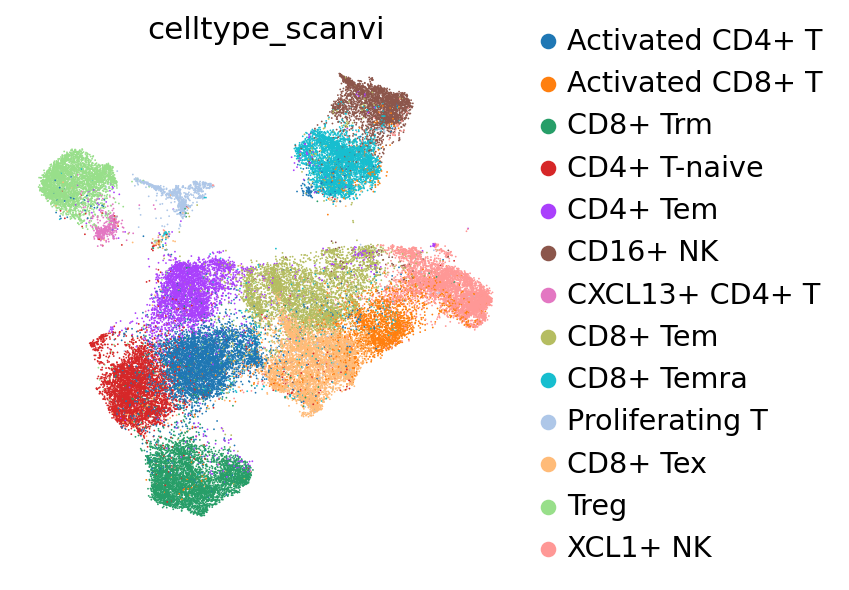

In [103]:
sc.pl.umap(adata, color = 'celltype_scanvi', save="landscape_TNK.pdf")

In [40]:
adata

AnnData object with n_obs × n_vars = 46625 × 3000
    obs: 'patient_id', 'condition', 'sampletype', 'nCount_RNA', 'nFeature_RNA', 'mt_ratio', 'celltype', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'scanvi_leiden_1.0', 'scanvi_leiden_1.2', 'scanvi_louvain_1.0', 'scanvi_louvain_1.2', 'celltype_scanvi'
    var: 'vst.mean-0', 'vst.variance-0', 'vst.variance.expected-0', 'vst.variance.standardized-0', 'vst.variable-0', 'vst.mean-1', 'vst.variance-1', 'vst.variance.expected-1', 'vst.variance.standardized-1', 'vst.variable-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'C_scANVI_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'condition_colors', 'hvg', 'log1p', 'neighbors', 'patient_id_colors', 'sampletype_colors', 'umap', 'leiden', 'scanvi_leiden_1.0_colors', 'scanvi_leiden_1.2_colors', 'rank_genes_groups', 'louvain', 'scanvi_louvain_1.0_colors', 'scanvi_louvain_1.2_colors', 'celltype_scanvi_

In [33]:
adata.obs['condition'] = (
    adata.obs["condition"]
    .map(lambda x: {"PNT": "PNT", "PT": "PT", "RT": "PT"}.get(x, x))
    .astype("category")
)

In [34]:
def cluster_small_multiples(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=adata.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


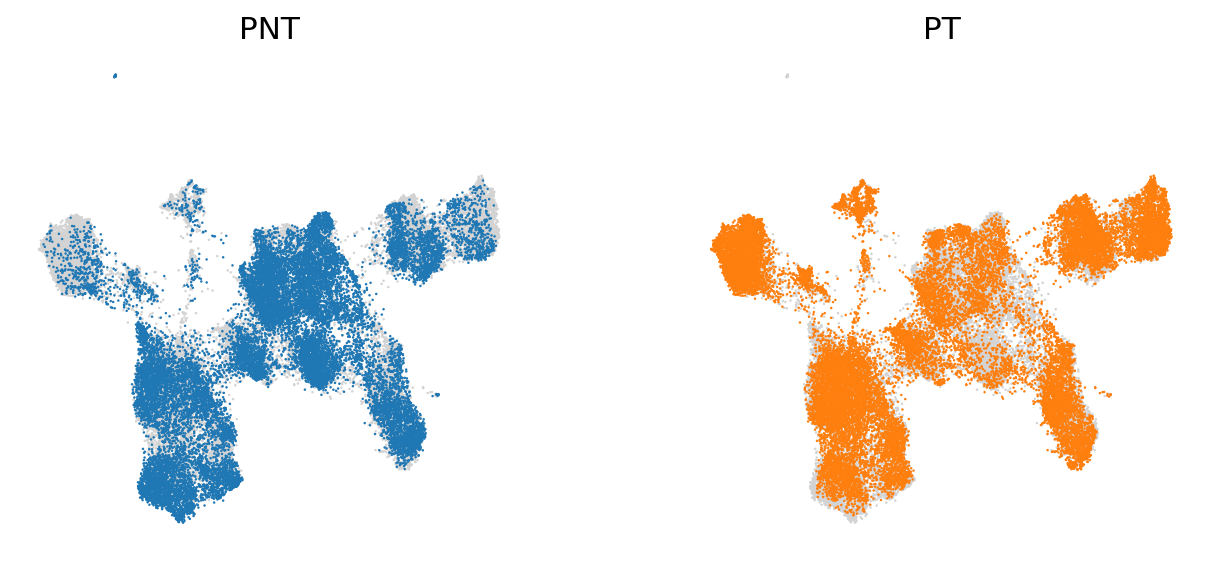

In [35]:
cluster_small_multiples(adata, clust_key = 'condition', size=5)

In [36]:
adata.write('adata_TNK_integrated.h5ad')

In [4]:
adata = sc.read_h5ad('adata_TNK_integrated.h5ad')

In [5]:
# marker gene visualization
markers = {
    "Canonical": ['CD3D', 'CD4', 'CD8A'], 
    'Activated CD4+ T': ['FOS', 'JUNB'],
    'Activated CD8+ T': ['JUND', 'HSP90AB1'], 
    'CD8+ Trm': ['CCL20', 'CCR6'], # Th17 like chemokines
    'CD4+ T-naive': ['CCR7', 'SARAF'], 
    'CD4+ Tem': ['CD40LG', 'TXNIP'], 
    'CD16+ NK': ['FCGR3A', 'FGFBP2'], 
    'CXCL13+ CD4+ T': ['CXCL13', 'IL6ST'], 
    'CD8+ Tem': ['GZMK', 'IFNG'], 
    'CD8+ Temra': ['PRF1', 'GZMH'],  # inflammation
    'Proliferating T': ['TOP2A', 'MKI67'], 
    'CD8+ Tex': ['TNFRSF9', 'PDCD1'],  # tissue resident
    'Treg': ['FOXP3', 'CTLA4'], 
    'XCL1+ NK': ['XCL1', 'XCL2']
}

In [10]:
adata_CD8T = adata[adata.obs.celltype_scanvi.isin(['Activated CD8+ T', 'CD8+ Trm', 'CD8+ Tem', 'CD8+ Temra', 'CD8+ Tex'])]

In [76]:
markers_cd8 = {
    'Activated CD8+ T': ['JUND', 'HSP90AB1'], 
    'CD8+ Trm': ['CCL20', 'CCR6'], # Th17 like chemokines
    'CD8+ Tem': ['GZMK', 'IFNG'], 
    'CD8+ Temra': ['PRF1', 'GZMH'],  # inflammation
    'CD8+ Tex': ['TNFRSF9', 'PDCD1', 'LAG3'],  # tissue resident
}

/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


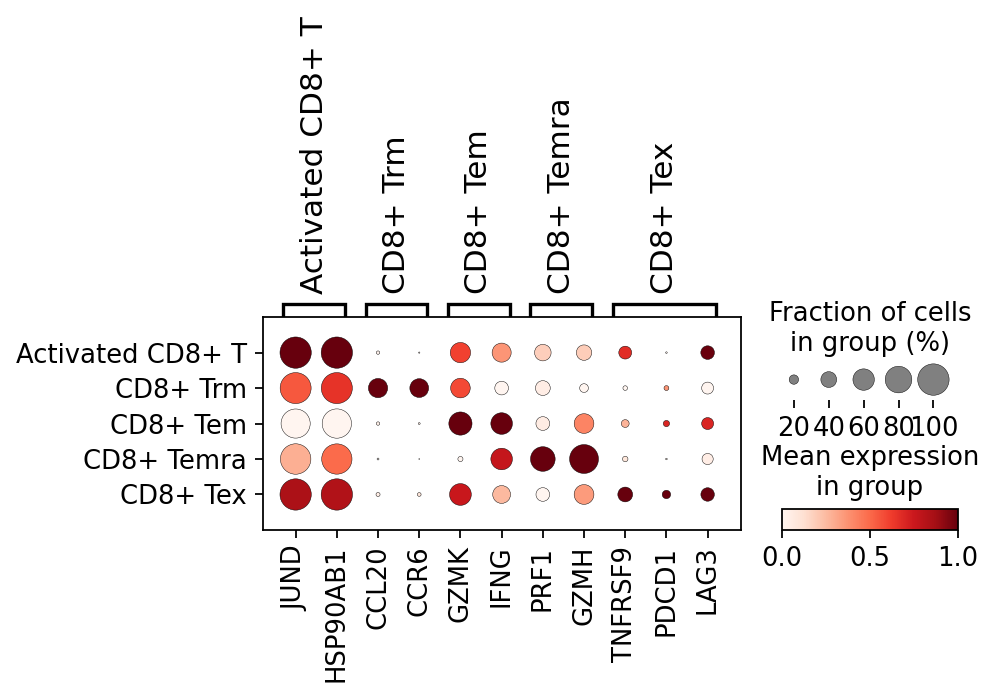

In [107]:
sc.pl.dotplot(adata_CD8T, markers_cd8, 'celltype_scanvi', color_map='Reds', use_raw=True, standard_scale='var', save="CD8_marker.pdf")

In [11]:
adata_CD8T_NK = adata[adata.obs.celltype_scanvi.isin(['Activated CD8+ T', 'CD8+ Trm', 'CD8+ Tem', 'CD8+ Temra', 'CD8+ Tex', 'CD16+ NK', 'XCL1+ NK'])]

In [12]:
markers_cd8_nk = {
    "Canonical": ['CD3D', 'CD4', 'CD8A'],
    'Activated CD8+ T': ['JUND', 'HSP90AB1'], 
    'CD8+ Trm': ['CCL20', 'CCR6'], # Th17 like chemokines
    'CD16+ NK': ['FCGR3A', 'FGFBP2'],
    'CD8+ Tem': ['GZMK', 'IFNG'], 
    'CD8+ Temra': ['PRF1', 'GZMH'],  # inflammation
    'CD8+ Tex': ['TNFRSF9', 'PDCD1', 'LAG3'],  # tissue resident
    'XCL1+ NK': ['XCL1', 'XCL2']
}

/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


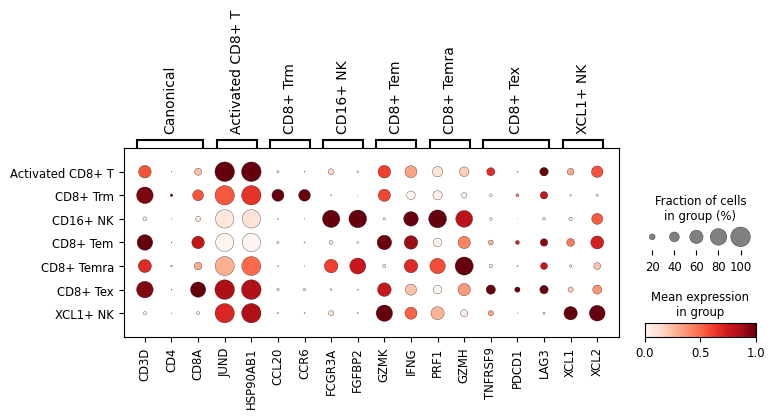

In [14]:
sc.pl.dotplot(adata_CD8T_NK, markers_cd8_nk, 'celltype_scanvi', color_map='Reds', use_raw=True, standard_scale='var', save="CD8_NK_marker.pdf")

In [15]:
adata_CD4T = adata[adata.obs.celltype_scanvi.isin(['Activated CD4+ T', 'CD4+ T-naive', 'CD4+ Tem', 'CXCL13+ CD4+ T', 'Treg'])]

In [21]:
markers_cd4 = {
    "Canonical": ['CD3D', 'CD4', 'CD8A'], 
    'Activated CD4+ T': ['FOS', 'JUNB'],
    'CD4+ T-naive': ['CCR7', "SARAF"], 
    'CD4+ Tem': ['KLRB1', 'TXNIP'],
    'CXCL13+ CD4+ T': ['CXCL13', 'IL6ST'], 
    'Treg': ['FOXP3', 'CTLA4'],
}

/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


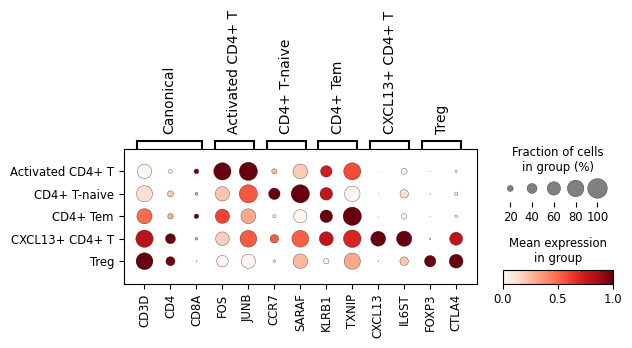

In [22]:
sc.pl.dotplot(adata_CD4T, markers_cd4, 'celltype_scanvi', color_map='Reds', use_raw=True, standard_scale='var', save="cd4_marker.pdf")

In [96]:
adata_nk = adata[adata.obs.celltype_scanvi.isin(['XCL1+ NK', 'CD16+ NK'])]

In [99]:
markers_NK = {
    'CD16+ NK': ['FCGR3A', 'FGFBP2'], 
    'XCL1+ NK': ['XCL1', 'XCL2']
}

/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


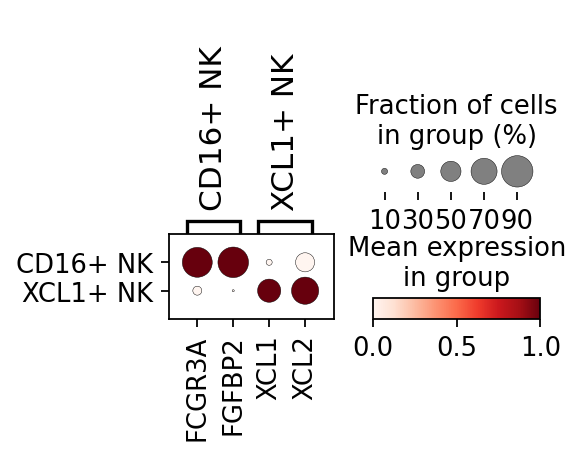

In [114]:
sc.pl.dotplot(adata_nk, markers_NK, 'celltype_scanvi', color_map='Reds', use_raw=True, standard_scale='var', save="markers_NK.pdf")

In [12]:
# re annotation
adata.obs['int_clusters'] = (
    adata.obs["int_clusters"]
    .map(lambda x: {"CD4+ Tcm": "CD4+ Tcm", "CD8+ Tem": "CD8+ Tem", "CD8+ Temra": "CD8+ Temra", "Treg": "Treg", "CD8+ Tex": "CD8+ Tex", "XCL1+ NK": "XCL1+ NK", "CD8+ Trm": "CD8+ Trm", "CD4+ activated": "CD4+ activated", "FCGR3A+ NK": "FCGR3A+ NK", "CD8+ Iem": "CD8+ activated", "CD8+ activated": "CD8+ activated", "XCL1+ NK": "XCL1+ NK", "Cycling cel": "Cycling cell", "CXCL13+ CD4+ T": "CXCL13+ CD4+ T", "T naive": "T naive"}.get(x, x))
    .astype("category")
)

In [3]:
adata = sc.read_h5ad("adata_TNK_integrated_sconly.h5ad")

/opt/miniconda3/envs/scverse/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


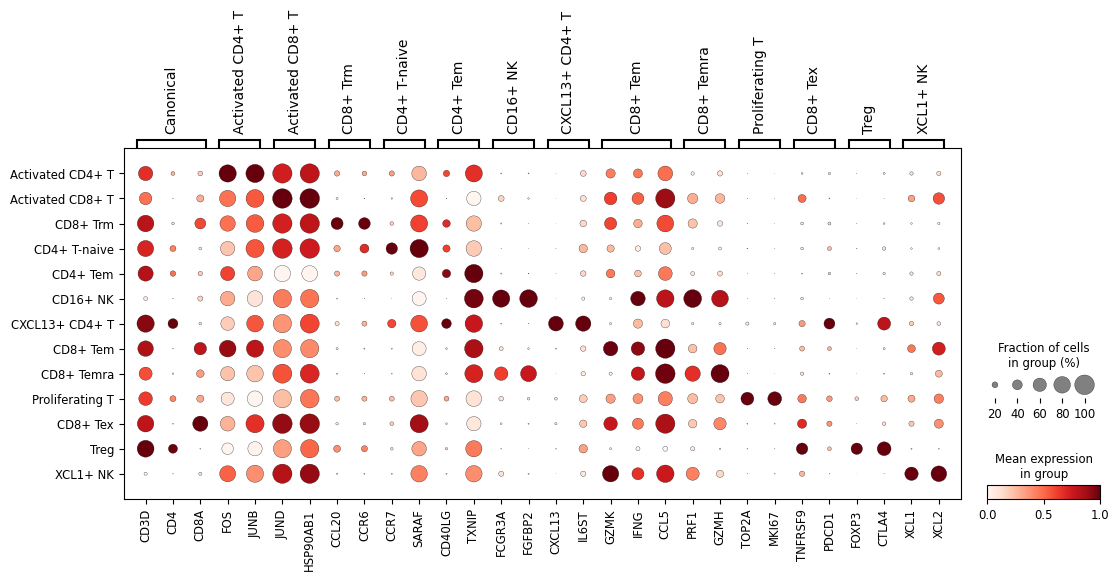

In [9]:
sc.pl.dotplot(adata, markers, 'celltype_scanvi', color_map='Reds', use_raw=True, standard_scale='var', expression_cutoff=0.5)

In [115]:
adata.write('adata_TNK_integrated_sconly.h5ad')